## Import modules 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Read Data 

In [2]:
data = pd.read_csv("JEOPARDY_CSV.csv")

In [3]:
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [5]:
data.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [6]:
data[" Round"].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

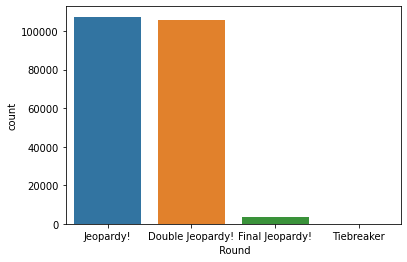

In [7]:
sns.countplot(x=' Round',data=data)

In [8]:
data[data[' Round'] == 'Jeopardy!'].count()

Show Number    107384
 Air Date      107384
 Round         107384
 Category      107384
 Value         107384
 Question      107384
 Answer        107383
dtype: int64

In [9]:
data[data[' Round'] == 'Final Jeopardy!'].count()

Show Number    3631
 Air Date      3631
 Round         3631
 Category      3631
 Value         3631
 Question      3631
 Answer        3631
dtype: int64

In [10]:
data[data[' Round'] == 'Tiebreaker'].count()

Show Number    3
 Air Date      3
 Round         3
 Category      3
 Value         3
 Question      3
 Answer        3
dtype: int64

In [11]:
data[data[' Round'] == 'Double Jeopardy!'].count()

Show Number    105912
 Air Date      105912
 Round         105912
 Category      105912
 Value         105912
 Question      105912
 Answer        105911
dtype: int64

In [12]:
data[" Category"].unique()

array(['HISTORY', "ESPN's TOP 10 ALL-TIME ATHLETES",
       'EVERYBODY TALKS ABOUT IT...', ..., 'OFF-BROADWAY',
       'RIDDLE ME THIS', 'AUTHORS IN THEIR YOUTH'], dtype=object)

In [13]:
data[' Category'].nunique()

27995

In [14]:
data.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

In [15]:
data[data[' Value'] == 'None'].count()

Show Number    3634
 Air Date      3634
 Round         3634
 Category      3634
 Value         3634
 Question      3634
 Answer        3634
dtype: int64

In [16]:
data.drop(data[data[' Value'] == 'None'].index,inplace=True)

In [17]:
data['ValueNum'] = data[' Value'].apply(
    lambda value: int(value.replace('$', '').replace(',','')))

In [18]:
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,ValueNum
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200


In [19]:
data['ValueNum'].nunique()

145

In [20]:
data['ValueNum'].describe()

count    213296.000000
mean        752.595923
std         637.855303
min           5.000000
25%         400.000000
50%         600.000000
75%        1000.000000
max       18000.000000
Name: ValueNum, dtype: float64

In [21]:
def binning(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

data['ValueBins'] = data['ValueNum'].apply(binning)

In [22]:
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,ValueNum,ValueBins
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200,200


In [23]:
data['ValueBins'].describe()

count    213296.000000
mean        762.394513
std         664.001766
min           0.000000
25%         400.000000
50%         600.000000
75%        1000.000000
max       20000.000000
Name: ValueBins, dtype: float64

In [24]:
data['ValueBins'].nunique()

21

In [25]:
data[" Question"]

0         For the last 8 years of his life, Galileo was ...
1         No. 2: 1912 Olympian; football star at Carlisl...
2         The city of Yuma in this state has a record av...
3         In 1963, live on "The Art Linkletter Show", th...
4         Signer of the Dec. of Indep., framer of the Co...
                                ...                        
216924    In 2006 the cast of this long-running hit emba...
216925    This Puccini opera turns on the solution to 3 ...
216926    In North America this term is properly applied...
216927    In Penny Lane, where this "Hellraiser" grew up...
216928    From Ft. Sill, Okla. he made the plea, Arizona...
Name:  Question, Length: 213296, dtype: object

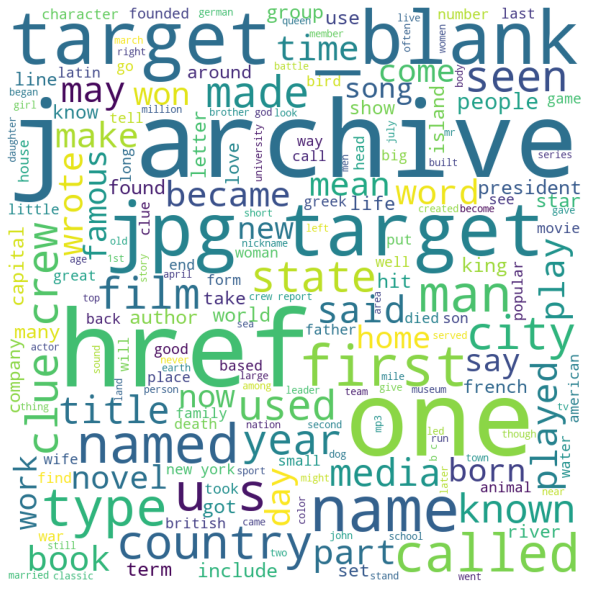

In [26]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in data[' Question']: 
      
    val = str(val) 
    tokens = val.split() 

    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [27]:
X = data[' Question']
y = data['ValueBins']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
RFC=RandomForestClassifier(max_features="sqrt",n_jobs=12)
tfidf = TfidfVectorizer(stop_words='english')

In [29]:
X = tfidf.fit_transform(X)

In [30]:
X

<213296x89634 sparse matrix of type '<class 'numpy.float64'>'
	with 1772005 stored elements in Compressed Sparse Row format>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [32]:
X_train

<142908x89634 sparse matrix of type '<class 'numpy.float64'>'
	with 1186570 stored elements in Compressed Sparse Row format>

In [33]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_jobs=12)

In [34]:
pred = RFC.predict(X_test)

In [35]:
pred

array([ 400,  200, 1000, ...,  600, 1000,  400])

In [36]:
y_test

213857     400
76324     1000
148435    1000
196229     800
95757     1000
          ... 
194810     800
168707     200
127061    1000
213672     400
189616     600
Name: ValueBins, Length: 70388, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score
confusion_matrix(y_test,pred)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   25,  598,   11, 1570,    4,   64,    0,  300,    0,  348,
          94,    1,    1,    0,    0,    1,    0,    0,    0,    0],
       [   0,  103, 1786,   54, 4977,   29,  276,    0, 1122,    0, 1316,
         399,    1,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,   20,  495,   19, 1461,    8,   64,    0,  290,    0,  349,
          90,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   85, 2146,   54, 6604,   50,  331,    0, 1627,    0, 2093,
         767,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,   19,  451,   11, 1427,   23,   80,    0,  373,    0,  518,
         165,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   43,  939,   35, 3164,   19,  172,    1,  800,    1, 1125,
         374,    0,    1,    0,    0,    0,    0,    0,    0,    0],